# AVOCADO : ORGANIC OR NOT?

Problem: using a Kaggle Database on Avocado I want to choose a model that can classify the type of an Avocado between "organic", and "conventional".

In [2]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_similarity_score
#
from sklearn.neighbors import KNeighborsClassifier
#
from sklearn import svm
#
from sklearn.tree import DecisionTreeClassifier
#
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the database and showing the firts 10 rows of the dataframe
df_avo = pd.read_csv('avocado.csv')
df_avo.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
#dropping useless columns
df_avo = df_avo.drop(['Unnamed: 0'], axis=1)

In [5]:
#changing columns names
df_avo.rename(columns={'4046': 'Small Hass Volume', '4225':'Large Hass Volume','4770':'Extra Large Hass Volume'}, inplace=True)

In [6]:
#converting datatypes
df_avo['Date'] = pd.to_datetime(df_avo['Date'])

In [7]:
#checking to see if there is any missing value in the data
missing_data = df_avo.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Date
False    18249
Name: Date, dtype: int64

AveragePrice
False    18249
Name: AveragePrice, dtype: int64

Total Volume
False    18249
Name: Total Volume, dtype: int64

Small Hass Volume
False    18249
Name: Small Hass Volume, dtype: int64

Large Hass Volume
False    18249
Name: Large Hass Volume, dtype: int64

Extra Large Hass Volume
False    18249
Name: Extra Large Hass Volume, dtype: int64

Total Bags
False    18249
Name: Total Bags, dtype: int64

Small Bags
False    18249
Name: Small Bags, dtype: int64

Large Bags
False    18249
Name: Large Bags, dtype: int64

XLarge Bags
False    18249
Name: XLarge Bags, dtype: int64

type
False    18249
Name: type, dtype: int64

year
False    18249
Name: year, dtype: int64

region
False    18249
Name: region, dtype: int64



In [8]:
#looking at basics statistical details 
df_avo.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
Small Hass Volume,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
Large Hass Volume,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
Extra Large Hass Volume,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


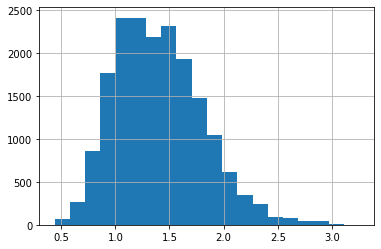

In [9]:
#graphic rapresentation of the average price distribution
df_avo['AveragePrice'].hist(bins=20)
plt.show()

In [10]:
#counting how many avocados of each type there are in the dataset
print(df_avo.groupby('type').size())

type
conventional    9126
organic         9123
dtype: int64


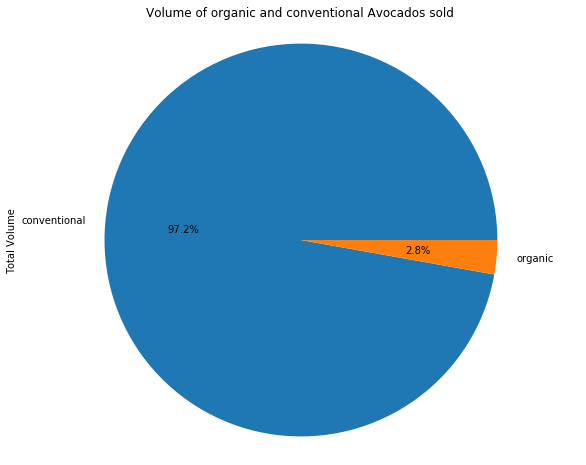

In [11]:
#graphic representation of the volume of the two types
df_avo.groupby('type')['Total Volume'].agg('sum').plot(kind='pie', figsize=(10,8), autopct='%1.1f%%')
plt.title("Volume of organic and conventional Avocados sold")
plt.axis('equal')
plt.show()

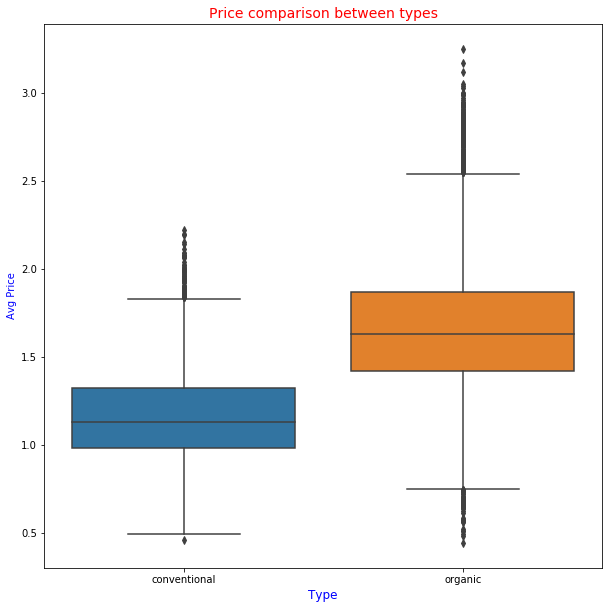

In [12]:
#graphic comparison between the two types' price
fig, ax=plt.subplots(figsize=(10,10))
sns.boxplot(x='type', y='AveragePrice', data=df_avo,)
plt.title('Price comparison between types', fontsize= 14 , color='red')
plt.xlabel('Type', fontsize=12, color='blue')
plt.ylabel('Avg Price',fontsize=10, color='blue')
plt.show()

In [13]:
#preparing the features for the model
X = df_avo[['Total Volume', 'Small Hass Volume', 'Large Hass Volume',
       'Extra Large Hass Volume', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags','year', 'AveragePrice']].values.astype('float')
Y = df_avo['type']


Now that the Database is ready I can start testing some classification models and see wich one is the more accurate.
The classification model I am going to use are: a Logistic Regression model, a K Nearest Kneighbor model, a Support Vector Machine model and a Decision Tree model.

In [14]:
#normalizing the features
SC = StandardScaler()
X = SC.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [15]:
#loading the model and predicting
LR = LogisticRegression()
LR.fit(x_train,y_train)
yhat1=LR.predict(x_test)

In [16]:
#valuation of the Logistic Regression model
print('classification report:\n',classification_report(yhat1, y_test))
print('confusion matrix:\n',  confusion_matrix(yhat1, y_test))
print('Jaccard Similarity Score:\n',jaccard_similarity_score(y_test, yhat1))

classification report:
               precision    recall  f1-score   support

conventional       0.90      0.94      0.92      2606
     organic       0.94      0.90      0.92      2869

    accuracy                           0.92      5475
   macro avg       0.92      0.92      0.92      5475
weighted avg       0.92      0.92      0.92      5475

confusion matrix:
 [[2443  163]
 [ 282 2587]]
Jaccard Similarity Score:
 0.9187214611872146


In [17]:
#loading the model and predicting
neigh = KNeighborsClassifier(n_neighbors = 4).fit(x_train, y_train)
yhat2= neigh.predict(x_test)
yhat2

array(['conventional', 'organic', 'conventional', ..., 'conventional',
       'conventional', 'organic'], dtype=object)

In [18]:
#K Nearest Kneighbors model accuracy
print('classification report:\n',classification_report(yhat2, y_test))
print('confusion matrix:\n',  confusion_matrix(yhat2, y_test))
print('Jaccard Similarity Score:\n',jaccard_similarity_score(y_test, yhat2))

classification report:
               precision    recall  f1-score   support

conventional       0.97      0.96      0.97      2774
     organic       0.96      0.97      0.97      2701

    accuracy                           0.97      5475
   macro avg       0.97      0.97      0.97      5475
weighted avg       0.97      0.97      0.97      5475

confusion matrix:
 [[2656  118]
 [  69 2632]]
Jaccard Similarity Score:
 0.9658447488584475


In [19]:
#loading the model and predicting
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
yhat3 = clf.predict(x_test)

In [20]:
#Support Vector Machine model accuracy
print('classification report:\n',classification_report(yhat3, y_test))
print('confusion matrix:\n',  confusion_matrix(yhat3, y_test))
print('Jaccard Similarity Score:\n',jaccard_similarity_score(y_test, yhat3))

classification report:
               precision    recall  f1-score   support

conventional       0.89      0.96      0.93      2541
     organic       0.96      0.90      0.93      2934

    accuracy                           0.93      5475
   macro avg       0.93      0.93      0.93      5475
weighted avg       0.93      0.93      0.93      5475

confusion matrix:
 [[2438  103]
 [ 287 2647]]
Jaccard Similarity Score:
 0.9287671232876712


In [21]:
##loading the model and predicting
avotree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
avotree.fit(x_train,y_train)
yhat4 = avotree.predict(x_test)

In [22]:
#Decision Tree model accuracy
print('classification report:\n',classification_report(yhat4, y_test))
print('confusion matrix:\n',  confusion_matrix(yhat4, y_test))
print('Jaccard Similarity Score:\n',jaccard_similarity_score(y_test, yhat4))

classification report:
               precision    recall  f1-score   support

conventional       0.94      0.96      0.95      2677
     organic       0.96      0.94      0.95      2798

    accuracy                           0.95      5475
   macro avg       0.95      0.95      0.95      5475
weighted avg       0.95      0.95      0.95      5475

confusion matrix:
 [[2571  106]
 [ 154 2644]]
Jaccard Similarity Score:
 0.9525114155251142


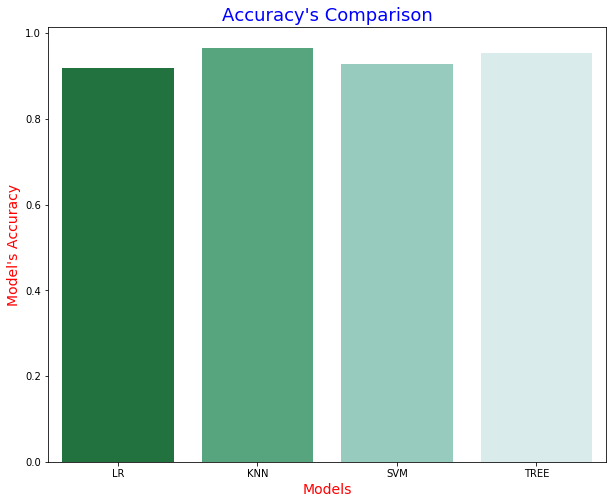

In [30]:
#comparing the Accuracy
names=['LR', 'KNN', 'SVM', 'TREE']
accuracy=[]
accuracy.append(metrics.accuracy_score(y_test, yhat1))
accuracy.append(metrics.accuracy_score(y_test, yhat2))
accuracy.append(metrics.accuracy_score(y_test, yhat3))
accuracy.append(metrics.accuracy_score(y_test, yhat4))

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=names, y=accuracy, palette='BuGn_r')
plt.xlabel('Models', fontsize=14, color='red')
plt.ylabel("Model's Accuracy", fontsize=14, color='red')
plt.title("Accuracy's Comparison", fontsize=18, color='blue')
plt.show()

The model with the best accuracy seems to be the K Nearest Kneighbor method, with an accuracy of the 0,97%.